---
> 「ファッションはすたれるが、スタイルは永遠だ」  
> イヴ・サンローラン
---

# StyleGAN

既にStyleGAN2に加えて、StyleGAN3が登場し、PyTorchでも動作するようになった
- 当時はtensorflowで実装されていたが、pytorchによる実装も増えてきた

様々あるGANの中でも著名なモデルが2018年に発表されたStyleGANである
- 下図はすべてStyleGANで自動的に生成された顔画像であり、実際にはその人物は存在しない
- StlyGANを用いた版権や肖像権のない人物画像によるポスターやwebページ制作が普通に行われている
- StyleGANよりもさらに高精細なStyleGAN2が存在する(後述)

<img src="http://class.west.sd.keio.ac.jp/dataai/text/styleganex.png" width=500>

StyleGANのネットワークの特徴
- Progressive Growingを用いた高解像画像生成
- AdaINを用いて各層に画像のStyleを取り込む

これらの特徴について説明し、StyleGANの詳細構造に移る

## StyleGANの導入

この回はGoogle Driveを利用し、その空き容量として2.5Gバイト程度必要である
- 容量に余裕のない学生は、コードを書き替えて対応可能であるが、苦労して取得、変換したデータがセッション終了とともに消えてなくなることに注意すること
- できれば新たなアカウントを取得するなどして空き容量のあるアカウントで実習されたい
  - 無料アカウントは15G提供されるためかなり余裕がある
- 企業やアカデミックアカウント(keio.jpなど)で容量無制限の場合は、遠慮なくこれを使おう
- 各種ファイルを保存するパスは各自で設定できるが、下記は推奨パス名である
  - パス名にスペースが入らないようにすること
  - 入ると途中処理が実行できないnVidia提供コードが存在する

StyleGANはnVidiaが提供するコードが存在する
- StyleGAN3はPyTorchに変更された
- 一方でPyTorchに変更され機能が強化されたが、メモリサイズが許可活かしており、簡単には実行できにくくなっている

その後、StyleGAN2の新しい実装StyleGAN2-ADAはPyTorchを利用するように改良されている
- StyleGANは提供されるコードは機能ごとによくまとまって実装されており、各提供機能を操作するだけでも様々なことができる

なお、Google Colabの仕様変更により、オリジナルのStyleGAN2を含むStyleGANのオリジナルのコードが実行できない状況にある
- そこで、StyleGAN2を改良したnVidiaによるStyleGAN2-ADAを利用する
  - https://github.com/NVlabs/stylegan2-ada-pytorch

## 関連モジュールのインストール

In [1]:
!pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.9/205.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: imageio-ffmpeg
    Found existing installation: imageio-ffmpeg 0.5.1
    Uninstalling imageio-ffmpeg-0.5.1:
      Successfully uninstalled imageio-ffmpeg-0.5.1


stylegan2-ada-pytorchをダウンロードする

In [2]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128 (from 1)
Receiving objects: 100% (131/131), 1.13 MiB | 2.71 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [3]:
%cd stylegan2-ada-pytorch

/content/stylegan2-ada-pytorch


# 事前学習モデルを利用した生成

ここでは、メモリ不足の問題を回避するため、外部コマンドとして(jupyter-notebookの外で)実行する
- 内部で実行すると、試行毎にプロセスが終了しないので実行するたび消費したメモリを解放せず全て抱え込むため、メモリ不足に陥る

## ffhqを利用した生成

generate.pyを利用して生成する
- ここでは、特にコード内部についてセルに展開しないため、実際にコードを確認するとよい

事前学習モデルであるADA用のFFHQをロードする

In [4]:
!python generate.py --outdir=results --trunc=1 --seeds=37  \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"...
Generating image for seed 37 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


生成した画像を確認する
- seedsで指定した番号が振られている
- オプションのシード値を変更すると別の画像を生成できる、例えば
  - --seeds=10,20,30
  - --seeds=100-104

生成されたファイルを確認する

In [5]:
ls results

seed0037.png


resultsディレクトリに生成された画像を、ダブル・クリックして表示してみるとよい
- 本来の解像度でファイルを表示することができる

なお、width(w)とheight(h)は、1024x1024など高解像度にすることで、より高い解像度の画像として確認することができる
- オリジナルは1024x1024で構成されている

画像ファイルを大きく指定するとノートブックの保存サイズも巨大化するためここでは小さめに指定している

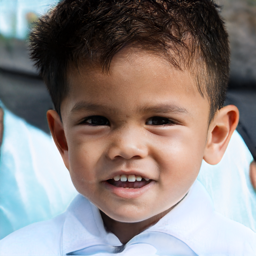

In [6]:
filepath = "results/seed0037.png"
import PIL.Image
w,h = 256, 256
img = PIL.Image.open(filepath)
img.resize((w, h))

## レンブラント風画像の生成

事前学習モデルであるADA用のmetfacesを利用する

In [7]:
!python generate.py --outdir=results --trunc=1 --seeds=85 \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl"...
Generating image for seed 85 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


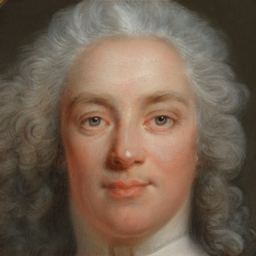

In [8]:
filepath = "results/seed0085.png"
import PIL.Image
w,h = 256, 256
img = PIL.Image.open(filepath)
img.resize((w, h))

## オリジナルのFFHQモデルを変換して利用する

stylegan2で構成されていたオリジナルの事前学習モデルも利用できる
- インターネットでダウンロードした事前学習モデルを利用できる

legacy.pyを用いて変換する

In [9]:
!python legacy.py \
    --source=https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl \
    --dest=stylegan2-ffhq-config-f.pkl

Loading "https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl"...
Saving "stylegan2-ffhq-config-f.pkl"...
Done.


In [10]:
!python generate.py --outdir=results/1x --trunc=1 --seeds=5 \
    --network=stylegan2-ffhq-config-f.pkl

Loading networks from "stylegan2-ffhq-config-f.pkl"...
Generating image for seed 5 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


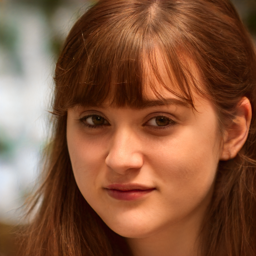

In [11]:
filepath = "results/1x/seed0005.png"
import PIL.Image
w,h = 256, 256
img = PIL.Image.open(filepath)
img.resize((w, h))

## 猫モデルの利用

猫も生成できる
- 猫モデルは、オリジナルのStylegGANにおいて学習済みモデルとして提供されているため、legacy.pyを用いて変換する
- モデルが古いため、クオリティはいまいちである

In [12]:
!python legacy.py \
    --source=https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-cat-config-f.pkl \
    --dest=stylegan2-cat-config-f.pkl

Loading "https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-cat-config-f.pkl"...
Saving "stylegan2-cat-config-f.pkl"...
Done.


In [13]:
!python generate.py --outdir=results/1x  --trunc=1 --seeds=8 \
    --network=stylegan2-cat-config-f.pkl

Loading networks from "stylegan2-cat-config-f.pkl"...
Generating image for seed 8 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


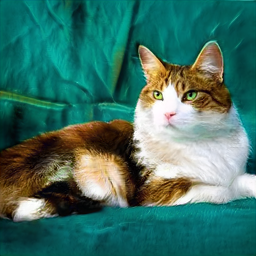

In [14]:
filepath = "results/1x/seed0008.png"
import PIL.Image
w,h = 256, 256
img = PIL.Image.open(filepath)
img.resize((w, h))

## figuresデモ

次に、よくあるStyleGANのデモにある写真集を作成する

関連モジュールをインストールする

In [15]:
!pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

# StyleGANのオリジナルのコードを参考に、サンプル集を生成

In [16]:
import os
import numpy as np
import PIL.Image
from IPython.display import Image,display_png

import torch
import dnnlib
import legacy

def draw_uncurated_result_figure(seed=0, outdir='results'):
    network_pkl = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl'
    cx=0; cy=0; cw=1024; ch=1024; rows=1; lods=[0,1,2,2,3,3]
    png = outdir + '/uncurated_images.png'
    os.makedirs(outdir, exist_ok=True)

    print(png)

    print('Loading networks from "%s"...' % network_pkl)
    device = torch.device('cuda')
    with dnnlib.util.open_url(network_pkl) as f:
        G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

    # latents = np.random.RandomState(seed).randn(sum(rows * 2**lod for lod in lods), G.input_shape[1])
    latents = np.random.RandomState(seed).randn(sum(rows * 2**lod for lod in lods), G.z_dim)
    # images = Gs.run(latents, None, **synthesis_kwargs) # [seed, y, x, rgb]
    dlatent = G.mapping(torch.from_numpy(latents).to(device), None)
    images = G.synthesis(dlatent, noise_mode='const')
    images = (images.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8).cpu().numpy()

    canvas = PIL.Image.new('RGB', (sum(cw // 2**lod for lod in lods), ch * rows), 'white')

    image_iter = iter(list(images))
    for col, lod in enumerate(lods):
        for row in range(rows * 2**lod):
            image = PIL.Image.fromarray(next(image_iter), 'RGB')
            image = image.crop((cx, cy, cx + cw, cy + ch))
            image = image.resize((cw // 2**lod, ch // 2**lod), PIL.Image.ANTIALIAS)
            canvas.paste(image, (sum(cw // 2**lod for lod in lods[:col]), row * ch // 2**lod))
    canvas.save(png)

    # display_png(Image(outdir+'/uncurated_images.png'))
    return canvas

In [17]:
seed=2
outdir="results/uncurated_images"

Uncurated imagesの生成
- メモリ制限のため生成数を3分の1にしている

実際に、resultsフォルダを見て生成画像を確認するとよい

オリジナルと違い、アジア人の顔も生成されやすい傾向にある
- オリジナルはデータセットにCelebAを利用していたが、よりグローバルなデータセットに変更されている様子

In [18]:
draw_uncurated_result_figure(seed, outdir)

Output hidden; open in https://colab.research.google.com to view.

## StyleGANの動作内容を理解する

ここまで示したのは、StyleGAN2 ADAであるが、オリジナルのStyleGANについて説明し、その後StyleGAN2について述べる

StyleGAN2ではStyleGANにおいて本質的要素であるかのように説明されている内容がいとも簡単に修正されているので、気を付けること

### Progreesive Growing によるPG-GANの応用

なぜStyleGANはこのような高解像度かつ自然な画像を生成できるのか
- 大きな画像生成では伝搬情報が薄れ高精細な画像が得られなかった
- この問題を解決する基本はProgressive Growing GAN (PG-GANと表記)
- なお、StyleGAN2ではPG-GANは採用されていない(MSG-GANをベースにしている)

<img src="http://class.west.sd.keio.ac.jp/dataai/text/sg-pggan.jpg" width=600>

- 4x4の小さな画像から段階的に画像を大きくし、最終的に1024x1024の画像を得る
  - 結果的に学習を安定化できる
- 画像の解像度を上げる際にも畳み込みを行った画像へと変換するが、$1-\alpha:\alpha$という内分比を徐々にずらして実施することで安定した学習ができるように工夫している

<img src="http://class.west.sd.keio.ac.jp/dataai/text/sg-pggan2.jpg" width=600>

例えば`16x16`から
`32x32`など、解像度を上げる際には畳み込みを利用
- 但し、いきなり畳み込みを行わず、隣接ピクセルをコピーするというシンプル手法である最近傍フィルタリングで縦横それぞれ2倍に拡大させた画像から、徐々に畳み込みを行った画像とする
- 最終的には$\alpha = 1$として畳み込み画像と同一にする
- ResNetの残差ブロック(ショートカットパス)と同じ意味を持つ

<img src="http://class.west.sd.keio.ac.jp/dataai/text/residual_block.jpg" width=300>

- 解像度を上げるネットワークを追加しても、低解像画像を生成するGと判別するDはパラメータを固定せずに学習させ続ける
- 学習過程でネットワークを修正させるためDefine-by-Runではないか？ということになるが、Define-by-Runは計算グラフ（NNのネットワーク）構築をデータを流しながら行うことを意味するためそうではない
  - データを流し終わってから、つまりエポック単位でネットワークを切り替えるため正確にはDefine-by-Runではない
  - PyTorchでなくとも、学習させたパラメータを保存、ネットワークを再定義し、学習させたパラメータを再度必要な個所に読み込むなどすれば、同様のモデルを構築できる

なお、StyleGAN2では、このスタイルブロックも修正されている
- $B$のノイズの入力がブロックの外に出された
- AdaINは利用せず、標準偏差のみ利用

### マッピングネットワーク(Mapping Network)

その`4x4`から`8x8`に拡張する際の処理がPG-GANとStyleGANでは多少異なる

<img src="http://class.west.sd.keio.ac.jp/dataai/text/pg-gan2.png" width=150>
<img src="http://class.west.sd.keio.ac.jp/dataai/text/stgan-mn.png" width=150>

- 左図はPG-GANのマッピングネットワークを表しており、ガウス分布(正規表現)に基づくノイズ(要するに乱数)を全結合・正規化・畳み込み・正規化を経て次のブロックに伝えるという処理を行う
- 右図はStyleGANのマッピングネットワークを合わしており、同様にノイズ入力を正規化した後、全結合層のみ8回繰り返すことで潜在空間表現を得る
- この潜在空間表現は、ノイズの持つ次元よりも大幅に次元拡張されている
  - 実際には512次元のベクトルが18列並んだ空間である
  - なぜ18かは後でわかる
- この潜在空間表現を得るための次元拡張手段をマッピングネットワークとよぶ

実はこのマッピングネットワークこそがStyleGANの神髄といえるが、その理解には潜在空間の理解が必要となるため、詳細な説明は全体説明の後にまわす

### 合成ネットワーク

上記潜在空間から顔画像を生成するネットワークを合成ネットワーク(Synthesis Network)と呼ぶ
- 得られた潜在空間をPG-GANと同様の構造で学習する

<img src="http://class.west.sd.keio.ac.jp/dataai/text/stgan-sn.png" width=150>

`4x4`の画像生成部
- PG-GANではノイズを与えたが、StyleGANでは定数を与える
- 定数を正規化し畳み込みを行った後再び正規化する

`8x8`の画像生成部
- アップサンプリングして画像を拡大する
- 正規化し、畳み込みを行った後再び正規化する

この後、`16x16`、`32x32`と続け、最終的に`1024x1024`の画像を得る

マッピングネットワークで得られた潜在空間の各要素を、それぞれ異なる合成ネットワーク内の異なる画像サイズに対する処理の正規化に利用する
- さらに別途ノイズ(乱数)を準備し、各ブロックの正規化前の値にバイアスとして足しこむ

<img src="http://class.west.sd.keio.ac.jp/dataai/text/stgan-mnsn.png" width=500>

### 正規化(Normalization)

既に何度か扱っているが、ここで復習しておく

一般的には、Batch Normalizationが行なわれるが、PG-GANやStyleGANでは、正規化としてInstance Normalizationが行なわれる
- 実際の計算は平均を$\mu$、分散を$\sigma$とすると次の式に従う
  - なお、これまでもしばしば正規化項(下記大きな括弧の中・分数部分)を$Z$として表記してきたが、特にこれをZスコアと呼ぶ

$$N(x) = \gamma \left (\frac{x-\mu(x)}{\sigma(x)} \right )+\beta$$

- 実際の分散の計算においては、分母にあるため0とならないように極めて小さい値を足すという処理が追加されている
- ここでは、さらにパラメータとして$\gamma$を掛け$\beta$を足し合わせている

ここで、Normalizationについて改めてまとめておく
- Normalizationをどの範囲で行うかという適用範囲は様々あり、それぞれ名称が異なる
  - ここではCNNの表現に従い、それぞれバッチサイズ N, チャンネル数 C, 画像の縦幅 H, 画像の横幅 W としている

<img src="http://class.west.sd.keio.ac.jp/dataai/text/groupnorm-gn-zu.png" width=500>





### Adaptive Instance Normalization (AdaIN) によるStyle Transfer (スタイル変換)

さてここで再びスタイルトランスファーの登場であるが、StyleGANにおけるスタイル変換の基本となるAdaptive Instance Normalizationについて説明する

AdaINはスタイル変換のための正規化手法の一つ
- 元々は、コンテンツ入力とスタイル入力について、平均と分散を用いて正規化する手法
- AdaINによるスタイル変換の例を下図に示す
  - ビル群がコンテンツ画像、下の絵画がスタイル入力

<img src="http://class.west.sd.keio.ac.jp/dataai/text/AdaIN.png" width=500>

AdaINは、Instance Normalizationなどの正規化手法と異なり、スタイルとコンテンツ画像の統計量(標準偏差と平均値)のみで正規化を行い、学習パラメータを使用しない
- よって、訓練データとして利用していないスタイルを用いた場合でもスタイル変換が可能

$$AdaIN(x,y)=\sigma(y)\left (\frac{x-\mu(x)}{\sigma(x)}\right )+\mu(y)$$

- ここで、$x$が元画像、$y$がスタイル画像である
- スタイル画像の標準をZスコアに乗じ、スタイルの平均を加えるという処理を施す
- オリジナルの画像の持つ平均や分散を、スタイル画像の持つ平均や分散に置き換えるという処理を想定している
  - 平均と分散を揃えるだけなので、前回学んだスタイルトランスファーとは処理も意味が若干異なる

StyleGANでは、この方法を踏襲し、次のような式で求める

$$AdaIN(\boldsymbol x_i,\boldsymbol y)=\boldsymbol y_{s,i}\left (\frac{\boldsymbol{x}_i-\mu(\boldsymbol{x}_i)}{\sigma(\boldsymbol{x}_i)}\right )+\boldsymbol{y}_{b,i}$$

- AdaINのオリジナルと似た式を用いるが、標準偏差と平均値の代わりに、スタイルベクトルWに線形変換を加えた$y_s$と$y_b$という値を利用する
- $\boldsymbol{x}_i$は$i$番目の元画像の特徴マップ、つまり畳み込みによって得られた特徴マップ(Feature map)のテンソルを意味する
- $\boldsymbol{y}$はマッピングネットワークの出力である潜在空間の一部を意味する
  - さらにこの$\boldsymbol{y}$を$\boldsymbol{y}_{s,i}$と$\boldsymbol{y}_{b,i}$に分け、それぞれマッピングネットワークの出力である潜在空間の一部を利用する
  - これでマッピングネットワークの出力としての潜在空間が512次元のベクトルが18列並んだ空間であることが理解できる
    - `4x4`から`1024x1024`の9列あり、各列で$s$と$b$の2列必要となることから18列となる

結局のところ、シンプルな一次変換$y=ax+b$の形で表現するにあたり、どのような値が適切かを模索した結果であろう

### Adaptive Instance Normalizationの計算グラフ

<img src="http://class.west.sd.keio.ac.jp/dataai/text/adain-flow.png" width=500>

- 潜在空間$W$の1要素$s$と学習パラメータ$w$、共に512次元、全体で1024次元について線形演算を行う
- まず$s$について重みパラメータ$w$と掛け合わせる
  - なお、$w$は512次元が2列あるため、ブロードキャストにより次元拡張される
- 次にこの値にバイアスパラメータ$b$を足しこむ
  - 結果としてInstance Normalizationとして1024チャネルであり、1024次元ベクトル(テンソル)がここで生成される
- このベクトルを2つの512次元($\boldsymbol y_{s,i}$と$\boldsymbol y_{b,i}$)に分割し、それぞれを以降の分散の計算と平均の計算に利用する
- 分散について$x$と掛け合わせる
  - 特徴マップ$x$は例えば4x4の画像データに関する512次元のテンソル$(512,4,4)$である
  - $\boldsymbol y_{s,i}$と掛け合わせることでブロードキャストされ$(512,4,4)$のテンソルを得る
- 最後に平均$\boldsymbol y_{b,i}$と足し合わせることで$AdaIN(\boldsymbol x_i,\boldsymbol y)$を得る
  - 従って、4x4において得られるのは同様にブロードキャストされ$(512,4,4)$のテンソルである

このように、内部で保持する重み$w$とバイアス$b$は、そのあとの平均・分散演算に対する重みとバイアスでもあり、得られた値が次の層へと伝えられる

### StyleGANの全体構造

以上まとめて全体構造は次の通り

<img src="http://class.west.sd.keio.ac.jp/dataai/text/stylegan-fig.png" width=500>

重要な点は、次の通り
- マッピングと合成の2つのネットワーク
- マッピングネットワークのスタートは「正規分布ノイズ$z$」で、これをを$w$にマッピング
- 合成ネットワークのスタートは「固定値」
- $w$を中間的な特徴空間に利用($A$)しPG-GANで合成
- ノイズ$B$が各特徴マップに足しこまれる
  - ノイズは生成画像の確率的要素を司る(髪の毛の流れ方・肌のしわ)
- 異なる$z$から先生した$w$を層毎ランダムに入れ替える(mixing regularization)
  - 連続する合成ネットワークの層間のスタイルが相関を持つことを避ける
  - 避けることでFID(画像の美しさの指標)はあがるが、問題が発生する(StyleGAN2)
  - それぞれのスタイルは異なる特性を担当するためStyle Mixingに貢献

以下、StyleGANの工夫点についていくつか説明する


# 課題

StyleGANを用いて、1024x1024の男女と思われる顔画像をそれぞれ1つづつ生成させない

また、その生成に用いたseed値を明記しなさい

# generate.pyについて



## オプション

--network

.pklファイルを指定し、直接ファイルを指定しても、インターネットURLを指定してもよい

--seeds

モデルからランダムなシードを選択する
- StyleGANへの入力は512次元の配列であり、シードが512個の値を生成する
- 同じシード値であれば、常に同じランダムな配列が生成されるため、同一の結果を得ることができる
- 複数の値を指定することも、範囲を指定することもできる

--out

結果を出力するディレクトリを指定する


## 条件付きモデルで画像を生成

generate-imagesオプションをしている

--class

クラス・ラベルを使って学習したモデルについて、classオプションで出力したいクラスを指定する

```
python generate.py generate-images --network="/content/network.pkl" --seeds=0-10 --outdir="./out/". --class=1```

## トランケーション・トラバーサル

潜在空間を切り捨てる

使用する値により、生成画像に様々な影響を与えることができる

- 多くの場合0.5から1.0の間を選択するが、実際にはどのような値を与えてもよい

例えば、ある1つのシードに対して画像を生成し、切り捨て量を変化させるには次のように指定する
- -1 から 1 はかなり現実的な画像になるが、離れるほど奇妙な画像が生成される

--start

切り捨ての開始値

--stop

切り捨ての停止値であり、開始値より大きくすること

--increment

各フレームで切り捨て値をどれだけ増加させるかを指定する
- 長くて遅い補間を行う場合は、この値を小さくするとよい$(stop-start/increment=総フレーム数)$

```python generate.py truncation-traversal --network="/content/network.pkl" --seed=1 --start=-2.0 --stop=2.0 --increment=0.25 --outdir="./tt" --fps=30```

これで、ttフォルダーにtruncation-traversal-seed1-start-2.0-stop2.0.mp4という動画が生成される

個々のフレームもすべて必要な場合は、ttフォルダをzip圧縮して入手すること

## 補間

補間は、アニメーションのように見せるために、ベクトルに小さな変化を与えて生成するプロセス

2つの補間の例(線形補間とランダムノイズループ)は次のように指定する

以下のオプションを新たに指定する必要となる

--walk-type

補間のタイプを定義し、z空間を使うかw空間を使うかも指定できる

--frames -frames

生成するフレーム数を指定し、ビデオの長さを決定する

-trunc

切り捨て値を指定する


### 線形補間
あるシードから別のシードへの線形パスを生成する

w空間において線形補完を行うことで、最良の分離された補間が生成される
- 以下の例では、z空間で線形補完している

```python generate.py generate-latent-walk --network="/content/network.pkl" --walk-type="line-z" --seeds=0,1,0 --outdir="./z-walk" --frames=720```

w空間での線形補間を行う場合は、--walk-typeにline-wに設定する

同じシードを利用し、補間オプションだけ変更して試すとよい


### 球面線形補間（slerp）
線形補間は高次元GANにおいて最適とは言えないという議論がある
- 潜在空間において(-1から1)の正規分布の間で一様にサンプリングし、そのベクトルの長さの分布を求めると、平均が約5.76、標準偏差が0.25のガウス分布に近似される
- すなわち、ベクトルの99％以上が4.8から6.8（4σ）の間の長さを持つと予想されることを意味する

ここで、これらのランダム・ベクトル間の線形補間の効果について考える
- 2つのベクトルの中間に直線補間された中点を想定すると、平均ベクトルが4.06、標準偏差が0.24のガウス分布となる
この分布は予想された分布とは大きく異なっている
- 線形補間された経路上の点は、事前分布で予想される点から何標準偏差も離れている

(-1, 1)の正規分布が潜在空間全体にわたって一様なサンプリングを与えるのであれば、事前分布はより超球のような形であると考えられる

線形補間と球面補間の間に大きな差はないが、球面補間の方が同じ程度に変化を重ねるように見える

```python generate.py generate-latent-walk --network="/content/network.pkl" --walk-type="sphere-z" --seeds=0,1,0 --outdir="./z-sphere" --frames=720```

```python generate.py generate-latent-walk --network="/content/network.pkl" --walk-type="sphere-w" --seeds=0,1,0 --outdir="./w-sphere" --frames=720```


### ノイズ・ループ補間

ランダムに補間する場合はノイズループが最適である
- z空間を通してランダムなパスを作成し、多様な画像を表示する

--diameter

ループの幅を指定し、小さくするとサンプルの多様性が低減し、大きくすると多様性が拡大する

-framesを加えることで、動画のスピード感を決めることができる

--start_seed

Z空間での開始位置を変更する
- この値は、画像生成に使用するシードとは関係がない
- スタート地点をランダムに設定するために指定する

```python generate.py generate-latent-walk --network="/content/network.pkl" --walk-type="noiseloop" --start_seed=0 --outdir="./noise1"```


### 円ループ補間

ノイズループは、ランダムなループを提供しながらも、より均等に感じられるような画像群を生成する

- ノイズループよりも高い直径値を使うこと
- 50.0から500.0の間で--flamesを指定するとよい

```!python generate.py generate-latent-walk --network="/content/network.pkl" --walk-type="circularloop" --start_seed=0 --diameter=300.0 --frames=720 --outdir="./circleloop1"```


## ニア・ネイバーズ

気に入ったシードがについて、よりよい画像がないか、他の画像はどうか、などの探索を行うことができる

関連するオプションは以下の通り

--diameter

シードからどのくらい離れて画像を生成するかを指定
- .0000001という極近から、.5といった遠方の値を指定する

--num_samples

生成したいサンプル数を指定する

--save_vector

ベクトルを.npy形式でファイルに保存する

```python generate.py generate-neighbors --network="/content/network.pkl" --seeds=9 --outdir="./neighbors".```


## スタイル・ミキシング

シードはベクトル空間内の点情報であり、加算・減算などの算術処理を行うことができる
- 線形補間や中央のフレームを使用することもできるが、より柔軟に行う場に指定する

- 行と列を足し合わせるとどうなるかを示すグリッドを作成するために、いくつかのシードをとる

```python style_mixing.py --outdir="./stylemix" --rows=85,100,75,458,1500 --cols=55,821,1789,293 --network="/content/network.pkl"```


## フレッシュ・ディグレッション

フレッシュ・ディグレッションビデオcircular-25-10-2020-09-00-34-PM.mp4を出力する

```!python aydao_flesh_digressions.py --pkl "/content/network.pkl" --psi=0.6 --radius_small=10.0 --radius_large=800.00```


## 投影

モデルの外側から画像を取り込み、モデル内で最も近い潜在空間表現を見つけるプロセスである

関連する次のオプションがある

--target

モデルに投影したい画像のパスを指定する

学習したデータセットと同じ縦横比であれば、どのような画像でも指定することができる

```python projector.py --outdir="./projection" --target=/content/stylegan2-ada/flower.jpg --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl```
